# **Line Plot Visualizations**
Lesson provided by Sunil Narayan, Gia Bugieda, and Emma Adelmann

## What is a Line Plot?

A line plot is a type of chart used to show the change in one or more dependent variables over one independent variable. The dependent variables vary along the y-axis while the independent variable varies along the x-axis. It can be distinguished from a scatter plot in that a line graph connects data points together into a smooth line, instead of showing individual dots. Because of this, line plots are especially good at plotting continuous values, such as a change in a value over time.  

## When to use a line plot

You should use a line plot whenever you want to plot the continuous change in something relative to something else. One example of this is the change in a stock price (in this case, Bank of America), over time:

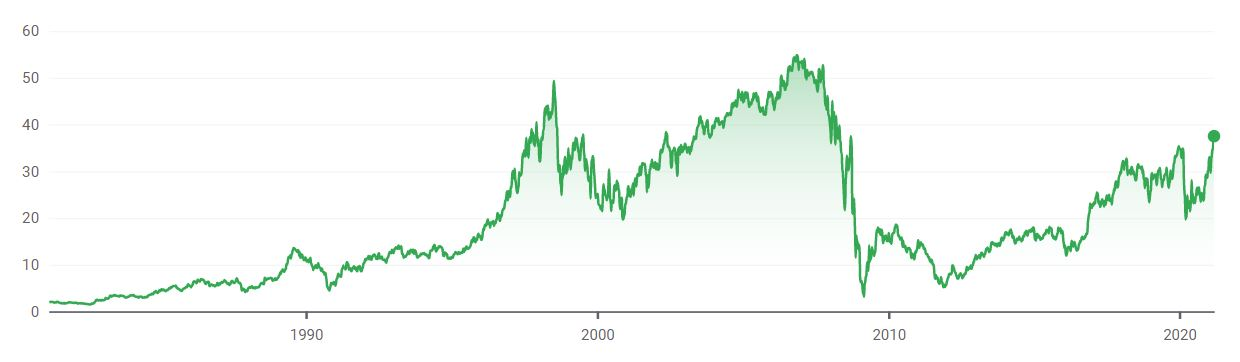

*Source: https://www.google.com/finance/quote/BAC:NYSE?sa=X&ved=2ahUKEwi51IjhtKbvAhWinOAKHRnhBOcQ_AUoAXoECAEQAw&window=MAX*

## Line Plot Mistakes

Don't use a line plot when you have a bunch of variables to plot. Line plots are the most clear when the user can follow just one or two lines, and can quickly get cluttered with more series. For example, try to make sense of this graph:

![bad line plot](http://stump.marypat.org/images/775.png?1511953831)

*Source: http://stump.marypat.org/article/866/who-has-the-highest-holdings-of-alternative-assets-has-it-paid-off*

With the visual chaos of that many lines, it is very difficult to make any sort of conclusion from this presentation of the data. If you do need to plot more than a few lines on the same graph, consider accenting one line as the focal point, breaking the graph down into multiple graphs, or changing the type of graph altogether

Another issue is trying to plot a data set with the wrong x-axis. A line graph should show some kind of continuous change and is almost always based around time. Plotting the wrong values on the x-axis will result in a nonsensical graph:

![nonsense graph](http://tomkleen.com/Excel/2013/006-Charts-Bad%20Examples_files/image005.jpg)

*Source: http://tomkleen.com/Excel/2013/006-Charts-Bad%20Examples.htm*

In the above example, this probably shouldn't be a line plot to begin with. If, for some reason, you really wanted to use a line plot here, the years should be on the x-axis, showing a change over time. 

Now that we know when to use a line plot and some pitfalls to avoid, lets get into 

## How to Code a Line Plot

There are many ways to create a line plot, but we are going to focus on how to do it with two libraries that are frequently used in data science: *Matplotlib* and *Seaborn*.  Plot examples will be created using data from the [CORGIS site about the emissions per country](https://corgis-edu.github.io/corgis/csv/emissions/).  For the following tutorial, we will be showing you line plots in reference to the United States' yearly emissions of C02.


#### **Matplotlib**

Plotting a basic line chart in Matplotlib is as follows:
<br> First, import the necessary libraries and read in your data file.  Then, do any cleaning or indexing that makes sense for your data.  I chose to select a portion of the data because I only want to look at emissions with respect to the U.S., not all countries in the csv.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

emissions = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/emissions/emissions.csv")
emissions.set_index("Country", inplace = True)
emissions_US = emissions.loc["United States"]

Next, determine what you want your x and y axis to be.  For this example, we will have the x axis represent time in years and the y axis represent the amount of carbon dioxide in kilotons.

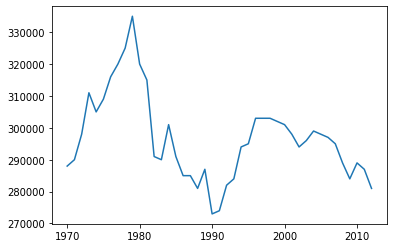

In [6]:
x = emissions_US["Year"]
y = emissions_US['Emissions.Type.CO2']

plt.plot(x,y)
plt.show()

If you want to add labels to the axes and include a title when creating your plot, you could write your code to match the section below.

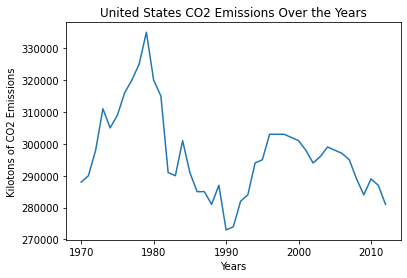

In [7]:
plt.title('United States CO2 Emissions Over the Years')
plt.xlabel('Years')
plt.ylabel('Kilotons of CO2 Emissions')
plt.plot(x,y)
plt.show()

You can also plot multiple lines on a chart.  Let's say I wanted to compare the CO2 emissions of the United States with Canada's CO2 Emissions.  The following code shows the process (using the x and y from above for US emissions).

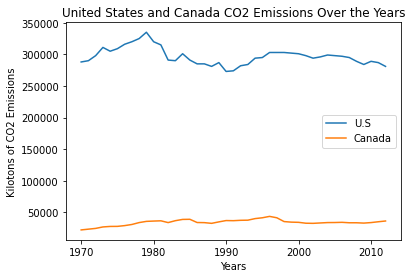

In [8]:
emissions_Canada = emissions.loc["Canada"]
x2 = emissions_Canada["Year"]
y2 = emissions_Canada['Emissions.Type.CO2']

plt.xlabel("Years")
plt.ylabel("Kilotons of CO2 Emissions")
plt.title("United States and Canada CO2 Emissions Over the Years")
plt.plot(x,y,label="U.S")
plt.plot(x2,y2,label="Canada")
plt.legend()
plt.show()

#### **Seaborn**

Using the same dataset, let's learn how to make the same graphs above, but this time, in seaborn.  

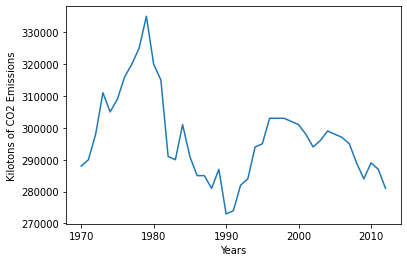

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

emissions = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/emissions/emissions.csv")
emissions.set_index("Country", inplace = True)
emissions_US = emissions.loc["United States"]
emissions_Canada = emissions.loc["Canada"]

sns.lineplot(x='Year',y='Emissions.Type.CO2',data=emissions_US)

plt.xlabel("Years")
plt.ylabel("Kilotons of CO2 Emissions")
plt.show()

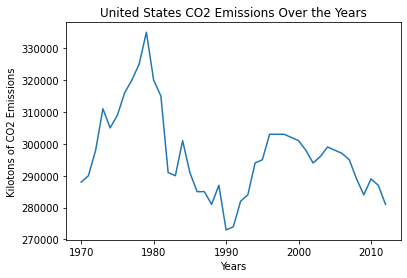

In [11]:
sns.lineplot(x='Year',y='Emissions.Type.CO2',data=emissions_US)

plt.title('United States CO2 Emissions Over the Years')
plt.xlabel("Years")
plt.ylabel("Kilotons of CO2 Emissions")
plt.show()

Finally, let's do a double line plot in seaborn.

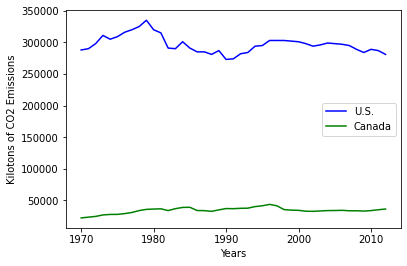

In [12]:
sns.lineplot(x='Year',y='Emissions.Type.CO2',data=emissions_US, color='blue')
sns.lineplot(x='Year',y='Emissions.Type.CO2',data=emissions_Canada,color='green')

plt.xlabel("Years")
plt.ylabel("Kilotons of CO2 Emissions")
plt.legend(labels=["U.S.", "Canada"])
plt.show()

## Alternate Visualizations
Sometimes, it is not clear whether a line plot is the right visualization for the job. Line plots are very good at showing a general trend over time (or some other variable). But if each plot point is going to be unique, then a **bar graph** may be the better option. Below is an example of a bar graph use case.

![bar graph](https://1k316p45x1m845sebu1kfwkjqpv-wpengine.netdna-ssl.com/wp-content/uploads/2021/01/bar-graph-example.png)

*Source: Dennis H. https://gfchart.com/2021/01/bar-graph-vs-line-graph-which-is-right-for-your-form/*

Since we are interested only in how many students have each month as their birthday, it doesn't make as much sense to turn it into a line plot. There is nothing "between" each month. Since a line plot is typically used to display a trend over time, it may reveal a "trend" that is not really there; the data is not meant to be interpreted as a time series, so it is better suited for a bar graph.

An alternative way to show a series over time is to use a **area chart**. An area chart differs from a line plot in that the area below the line is shaded, giving the data a sense of dimension and magnitude. This can serve as a useful graphical aid, helping you to interpret the general trend of the data. Area charts also come in a "stacked" variety to help show the net change between data groups.

![area chart](https://www.statisticshowto.com/wp-content/uploads/2018/05/area-chart-comparison.png)

*Source: https://www.statisticshowto.com/area-chart/*

## Variations
The most basic variety of line plot is the **simple** line plot, which has only one variable (one line). A **multiple line** plot has more than one variable.

## Check your understanding

Try and solve the following problem to ensure you understand the concepts taught above!

**Problem 1:** Using this [CORGIS dataset about global development records of different countries](https://corgis-edu.github.io/corgis/csv/global_development/), create a line plot showing the change of Spain's mobile cellular subscriptions over time. Make sure to include labels so someone can understand your visualization.  You can use either matplotlib or seaborn.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

development = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/global_development/global_development.csv")

# WRITE CODE HERE

**Problem 2:** Rate the following statements (T)rue or (F)alse:  
a. Line plots are used to show discrete data points  
b. Line plots are a good way of showing change over time  
c. Line plots require 1 independent variable on the x-axis   
d. A line plot with 17 lines is a good idea  

**Problem 3**: Imagine that you are analyzing [this CORGIS dataset on diseases in America](https://corgis-edu.github.io/corgis/csv/health/). You want to compare the prevalence of two diseases, Measles and Polio, throughout the years. It is more important to you that you understand the evolution of each variable than it is to compare the difference between the two. Which type of data visualization is best suited for this situation (choose one)?
<br>a. Simple line plot
<br>b. Bar graph
<br>c. Area chart
<br>d. Stacked area chart
<br>e. Multiple line plot